# 1. Importing dependencies 

In [1]:
import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Starting H2O

H2O will automatically check if an instance is already running and connect to

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,4 hours 9 mins
H2O cluster timezone:,America/Sao_Paulo
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,21 days and 14 hours
H2O cluster name:,H2O_from_python_Semantix_zpo2sn
H2O cluster total nodes:,1
H2O cluster free memory:,3.278 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


# 3. Importing data

In [3]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"

In [4]:
data = h2o.import_file(url, destination_frame = "airlines")

Parse progress: |█████████████████████████████████████████████████████████| 100%


# 4. Splitting the data 

In [5]:
train, valid, test = data.split_frame([0.8, 0.1], seed = 123)

In [6]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

35255/4272/4451


# 5. Running a Deep Learning model 

### defining the variables

We want to predict if the flight was delayed or not -> BINOMIAL CLASSIFICATION

In [7]:
y = "IsArrDelayed"
ignoreFields = [
    "ArrDelay", "DepDelay", "CarrierDelay", 
    "WeatherDelay", "SecurityDelay", "NASDelay",
    "LateAircraftDelay", "IsDepDelayed", "IsArrDelayed",
    "ActualElapsedTime"
]

xAll = [i for i in train.names if i not in ignoreFields]

In [8]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [9]:
m_DLdef = H2ODeepLearningEstimator()

%time m_DLdef.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 2min 36s


let's look at the model performance

In [10]:
m_DLdef.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08646917999455582
RMSE: 0.2940564231479323
LogLoss: 0.27192539342588073
Mean Per-Class Error: 0.12060526944786631
AUC: 0.9533889614117234
pr_auc: 0.8080511107920442
Gini: 0.9067779228234467

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44517137110069377: 

,,NO,YES,Error,Rate
0,NO,1667.0,318.0,0.1602,(318.0/1985.0)
1,YES,232.0,2234.0,0.0941,(232.0/2466.0)
2,Total,1899.0,2552.0,0.1236,(550.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.445171,0.890395,219.0
1,max f2,0.181418,0.923662,310.0
2,max f0point5,0.700105,0.916462,132.0
3,max accuracy,0.516232,0.878679,193.0
4,max precision,0.999933,1.000000,0.0
5,max recall,0.015884,1.000000,384.0
6,max specificity,0.999933,1.000000,0.0
7,max absolute_mcc,0.536708,0.755727,186.0
8,max min_per_class_accuracy,0.512160,0.877582,194.0
9,max mean_per_class_accuracy,0.536708,0.879395,186.0



Gains/Lift Table: Avg response rate: 55,40 %, avg score: 55,24 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011907,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.021492,0.021492,80.494728,80.494728
1,,2,0.020220,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.015004,0.036496,80.494728,80.494728
2,,3,0.030106,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.017843,0.054339,80.494728,80.494728
3,,4,0.040216,0.999998,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.018248,0.072587,80.494728,80.494728
4,,5,0.050101,0.999989,1.804947,1.804947,1.000000,0.999995,1.000000,0.999999,0.017843,0.090430,80.494728,80.494728
5,,6,0.100202,0.999246,1.804947,1.804947,1.000000,0.999753,1.000000,0.999876,0.090430,0.180860,80.494728,80.494728
6,,7,0.150079,0.996723,1.804947,1.804947,1.000000,0.998284,1.000000,0.999347,0.090024,0.270884,80.494728,80.494728
7,,8,0.200180,0.992358,1.804947,1.804947,1.000000,0.994828,1.000000,0.998216,0.090430,0.361314,80.494728,80.494728
8,,9,0.300157,0.957791,1.780611,1.796841,0.986517,0.979496,0.995509,0.991981,0.178021,0.539335,78.061092,79.684123
9,,10,0.400135,0.821245,1.630537,1.755288,0.903371,0.899344,0.972487,0.968834,0.163017,0.702352,63.053665,75.528843


In [11]:
m_DLdef

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1568466473771_84


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801.202 weights/biases, 9,2 MB, 353.523 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.514091,0.477046,0,6.57373e-05,0.0257611,-0.337098,0.263828
2,,3,200,Rectifier,0,0,0,0.268026,0.331516,0,-0.00443718,0.0940094,-0.028975,0.368201
3,,4,2,Softmax,,0,0,0.0160589,0.021487,0,0.015564,0.306028,0.00293615,0.0515899




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0733475465235643
RMSE: 0.2708275217247396
LogLoss: 0.23543782671645166
Mean Per-Class Error: 0.10055183426432057
AUC: 0.9666777308629276
pr_auc: 0.8296639574302281
Gini: 0.9333554617258553

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4726990723239882: 

,,NO,YES,Error,Rate
0,NO,3887.0,538.0,0.1216,(538.0/4425.0)
1,YES,494.0,5174.0,0.0872,(494.0/5668.0)
2,Total,4381.0,5712.0,0.1022,(1032.0/10093.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.472699,0.909315,210.0
1,max f2,0.261293,0.934404,284.0
2,max f0point5,0.675153,0.932200,141.0
3,max accuracy,0.472699,0.897751,210.0
4,max precision,0.999956,1.000000,0.0
5,max recall,0.010624,1.000000,390.0
6,max specificity,0.999956,1.000000,0.0
7,max absolute_mcc,0.570134,0.793622,176.0
8,max min_per_class_accuracy,0.513537,0.896083,196.0
9,max mean_per_class_accuracy,0.570134,0.899448,176.0



Gains/Lift Table: Avg response rate: 56,16 %, avg score: 55,68 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010502,1.000000,1.780699,1.780699,1.000000,1.000000,1.000000,1.000000,0.018701,0.018701,78.069866,78.069866
1,,2,0.020014,1.000000,1.780699,1.780699,1.000000,1.000000,1.000000,1.000000,0.016937,0.035639,78.069866,78.069866
2,,3,0.030021,1.000000,1.780699,1.780699,1.000000,1.000000,1.000000,1.000000,0.017819,0.053458,78.069866,78.069866
3,,4,0.040028,0.999998,1.780699,1.780699,1.000000,0.999999,1.000000,1.000000,0.017819,0.071277,78.069866,78.069866
4,,5,0.050035,0.999987,1.780699,1.780699,1.000000,0.999994,1.000000,0.999999,0.017819,0.089097,78.069866,78.069866
5,,6,0.100069,0.999460,1.780699,1.780699,1.000000,0.999800,1.000000,0.999899,0.089097,0.178193,78.069866,78.069866
6,,7,0.150005,0.997343,1.780699,1.780699,1.000000,0.998573,1.000000,0.999458,0.088920,0.267114,78.069866,78.069866
7,,8,0.200040,0.992820,1.780699,1.780699,1.000000,0.995282,1.000000,0.998414,0.089097,0.356210,78.069866,78.069866
8,,9,0.300010,0.959232,1.773639,1.778346,0.996036,0.980722,0.998679,0.992518,0.177311,0.533522,77.363940,77.834635
9,,10,0.399980,0.841269,1.695988,1.757762,0.952428,0.910402,0.987119,0.971994,0.169548,0.703070,69.598752,75.776174




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.09070319541908771
RMSE: 0.30116971198825376
LogLoss: 0.2864009087247018
Mean Per-Class Error: 0.1266223406204181
AUC: 0.9484650313415479
pr_auc: 0.8004761479903971
Gini: 0.8969300626830958

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4625506951683711: 

,,NO,YES,Error,Rate
0,NO,1586.0,307.0,0.1622,(307.0/1893.0)
1,YES,238.0,2141.0,0.1,(238.0/2379.0)
2,Total,1824.0,2448.0,0.1276,(545.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.462551,0.887093,208.0
1,max f2,0.204022,0.923414,302.0
2,max f0point5,0.696113,0.910372,128.0
3,max accuracy,0.472666,0.872425,205.0
4,max precision,0.999929,1.000000,0.0
5,max recall,0.011902,1.000000,388.0
6,max specificity,0.999929,1.000000,0.0
7,max absolute_mcc,0.545614,0.742283,181.0
8,max min_per_class_accuracy,0.539586,0.870113,183.0
9,max mean_per_class_accuracy,0.595149,0.873378,164.0



Gains/Lift Table: Avg response rate: 55,69 %, avg score: 55,83 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011470,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.020597,0.020597,79.571248,79.571248
1,,2,0.020131,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.015553,0.036150,79.571248,79.571248
2,,3,0.030197,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.018075,0.054224,79.571248,79.571248
3,,4,0.040028,0.999998,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.017654,0.071879,79.571248,79.571248
4,,5,0.050094,0.999984,1.795712,1.795712,1.000000,0.999993,1.000000,0.999999,0.018075,0.089954,79.571248,79.571248
5,,6,0.100187,0.999290,1.795712,1.795712,1.000000,0.999758,1.000000,0.999878,0.089954,0.179908,79.571248,79.571248
6,,7,0.150047,0.996850,1.787282,1.792911,0.995305,0.998252,0.998440,0.999338,0.089113,0.269021,78.728191,79.291106
7,,8,0.200140,0.992037,1.795712,1.793612,1.000000,0.994655,0.998830,0.998166,0.089954,0.358974,79.571248,79.361224
8,,9,0.300094,0.948639,1.762069,1.783106,0.981265,0.976278,0.992980,0.990876,0.176124,0.535099,76.206916,78.310608
9,,10,0.400047,0.817400,1.577031,1.731617,0.878220,0.889992,0.964307,0.965669,0.157629,0.692728,57.703087,73.161742




Scoring History: 

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-09-14 14:17:45,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-09-14 14:17:50,15.913 sec,1673 obs/sec,0.241271,1,8506.0,0.527780,0.784524,-0.131368,...,0.725787,1.780699,0.372139,0.529522,0.785253,-0.136279,0.713131,0.729349,1.795712,0.394429
2,,2019-09-14 14:19:34,2 min 2.612 sec,2986 obs/sec,8.358417,35,294676.0,0.297774,0.277243,0.639861,...,0.816046,1.780699,0.128406,0.319184,0.317666,0.587144,0.936917,0.807358,1.795712,0.142556
3,,2019-09-14 14:20:06,2 min 30.050 sec,3001 obs/sec,10.027599,42,353523.0,0.270828,0.235438,0.702091,...,0.829664,1.780699,0.102249,0.301170,0.286401,0.632430,0.948465,0.800476,1.795712,0.127575



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,ArrTime,1.000000,1.000000,0.002440
1,CRSArrTime,0.877635,0.877635,0.002141
2,DepTime,0.632282,0.632282,0.001543
3,CRSDepTime,0.628273,0.628273,0.001533
4,CRSElapsedTime,0.475729,0.475729,0.001161
5,AirTime,0.442168,0.442168,0.001079
6,TailNum.NA,0.420239,0.420239,0.001025
7,Cancelled,0.396449,0.396449,0.000967
8,UniqueCarrier.PS,0.384222,0.384222,0.000937
9,TaxiOut,0.365219,0.365219,0.000891



See the whole table with table.as_data_frame()


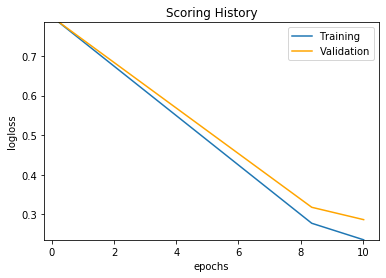

In [12]:
m_DLdef.plot()

# 6. Increasing the number of epochs 

In [13]:
m_DL200 = H2ODeepLearningEstimator(epochs = 200)

%time m_DL200.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 15min 21s


In [14]:
m_DL200.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08904949279583993
RMSE: 0.29841161638890656
LogLoss: 0.28443966688405947
Mean Per-Class Error: 0.10614860848088159
AUC: 0.9613779134261217
pr_auc: 0.5744473071704695
Gini: 0.9227558268522433

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2667466424957555: 

,,NO,YES,Error,Rate
0,NO,1752.0,233.0,0.1174,(233.0/1985.0)
1,YES,244.0,2222.0,0.0989,(244.0/2466.0)
2,Total,1996.0,2455.0,0.1072,(477.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.266747,0.903068,258.0
1,max f2,0.077750,0.932336,338.0
2,max f0point5,0.580086,0.920228,154.0
3,max accuracy,0.276278,0.893507,253.0
4,max precision,0.998550,0.999133,3.0
5,max recall,0.002346,1.000000,393.0
6,max specificity,0.999984,0.999496,0.0
7,max absolute_mcc,0.276278,0.785119,253.0
8,max min_per_class_accuracy,0.277684,0.892191,252.0
9,max mean_per_class_accuracy,0.322648,0.893851,239.0



Gains/Lift Table: Avg response rate: 55,40 %, avg score: 49,34 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.034374,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.062044,0.062044,80.494728,80.494728
1,,2,0.040216,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.010543,0.072587,80.494728,80.494728
2,,3,0.050101,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.017843,0.090430,80.494728,80.494728
3,,4,0.100202,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.090430,0.180860,80.494728,80.494728
4,,5,0.150079,0.999997,1.804947,1.804947,1.000000,0.999999,1.000000,1.000000,0.090024,0.270884,80.494728,80.494728
5,,6,0.200180,0.999944,1.804947,1.804947,1.000000,0.999984,1.000000,0.999996,0.090430,0.361314,80.494728,80.494728
6,,7,0.300157,0.989521,1.788723,1.799543,0.991011,0.997639,0.997006,0.999211,0.178832,0.540146,78.872304,79.954325
7,,8,0.400135,0.805245,1.662985,1.765423,0.921348,0.928384,0.978102,0.981514,0.166261,0.706407,66.298514,76.542289
8,,9,0.500112,0.420489,1.395285,1.691429,0.773034,0.603843,0.937107,0.906014,0.139497,0.845904,39.528509,69.142859
9,,10,0.600090,0.162984,0.888277,1.557620,0.492135,0.275209,0.862973,0.800919,0.088808,0.934712,-11.172257,55.762018


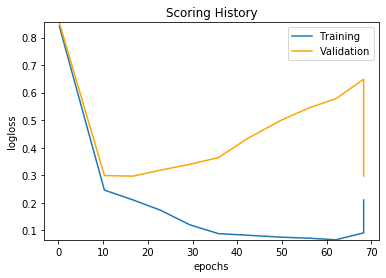

In [15]:
m_DL200.plot()

The model started overfitting around 20 epochs ...


# 7. Other tuning ideas - another layer?

In [16]:
m_200x200x200 = H2ODeepLearningEstimator(epochs = 200,
                                        hidden = [200, 200, 200]
                                        )

%time m_200x200x200.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 16min 41s


In [17]:
m_200x200x200.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08471892452797754
RMSE: 0.2910651551250639
LogLoss: 0.26606268028461505
Mean Per-Class Error: 0.10889661103858828
AUC: 0.9604698458225825
pr_auc: 0.7466212210840028
Gini: 0.9209396916451651

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6116050465341872: 

,,NO,YES,Error,Rate
0,NO,1708.0,277.0,0.1395,(277.0/1985.0)
1,YES,230.0,2236.0,0.0933,(230.0/2466.0)
2,Total,1938.0,2513.0,0.1139,(507.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.611605,0.898172,176.0
1,max f2,0.291982,0.931672,278.0
2,max f0point5,0.813144,0.923845,109.0
3,max accuracy,0.668786,0.887441,157.0
4,max precision,0.999936,1.000000,0.0
5,max recall,0.003298,1.000000,394.0
6,max specificity,0.999936,1.000000,0.0
7,max absolute_mcc,0.795600,0.777685,115.0
8,max min_per_class_accuracy,0.668786,0.886650,157.0
9,max mean_per_class_accuracy,0.795600,0.891103,115.0



Gains/Lift Table: Avg response rate: 55,40 %, avg score: 59,89 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011458,1.000000e+00,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.020681,0.020681,80.494728,80.494728
1,,2,0.020220,1.000000e+00,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.015815,0.036496,80.494728,80.494728
2,,3,0.030106,1.000000e+00,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.017843,0.054339,80.494728,80.494728
3,,4,0.040216,9.999998e-01,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.018248,0.072587,80.494728,80.494728
4,,5,0.050101,9.999980e-01,1.804947,1.804947,1.000000,0.999999,1.000000,1.000000,0.017843,0.090430,80.494728,80.494728
5,,6,0.100202,9.998502e-01,1.804947,1.804947,1.000000,0.999958,1.000000,0.999979,0.090430,0.180860,80.494728,80.494728
6,,7,0.150079,9.991744e-01,1.804947,1.804947,1.000000,0.999592,1.000000,0.999850,0.090024,0.270884,80.494728,80.494728
7,,8,0.200180,9.968775e-01,1.804947,1.804947,1.000000,0.998164,1.000000,0.999428,0.090430,0.361314,80.494728,80.494728
8,,9,0.300157,9.840763e-01,1.780611,1.796841,0.986517,0.991437,0.995509,0.996766,0.178021,0.539335,78.061092,79.684123
9,,10,0.400135,9.310718e-01,1.679209,1.767450,0.930337,0.964124,0.979225,0.988611,0.167883,0.707218,67.920938,76.744978


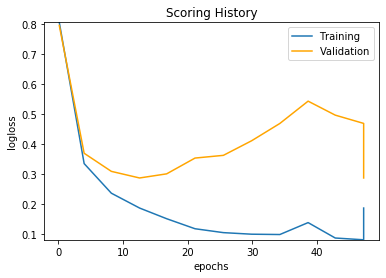

In [18]:
m_200x200x200.plot()

# 8. Other tuning ideas - adding neurons to the 2 layers?

In [19]:
m_400x400 = H2ODeepLearningEstimator(epochs = 200,
                                        hidden = [400, 400]
                                        )

%time m_400x400.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |█████████████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_a2ecfea825e5a8917a9fa692daf644c5> was cancelled by the user.

Why did it take longer?

In [20]:
m_DLdef.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801.202 weights/biases, 9,2 MB, 353.523 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.514091,0.477046,0,6.57373e-05,0.0257611,-0.337098,0.263828
2,,3,200,Rectifier,0,0,0,0.268026,0.331516,0,-0.00443718,0.0940094,-0.028975,0.368201
3,,4,2,Softmax,,0,0,0.0160589,0.021487,0,0.015564,0.306028,0.00293615,0.0515899


In [21]:
m_DLdef.summary()['units']

[3802, 200, 200, 2]

In [22]:
m_200x200x200.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 841.402 weights/biases, 9,7 MB, 1.663.805 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.107572,0.259818,0,-0.000557157,0.0335712,-0.0549096,0.388621
2,,3,200,Rectifier,0,0,0,0.0353988,0.0609715,0,-0.035515,0.081039,0.795511,0.0594853
3,,4,200,Rectifier,0,0,0,0.165684,0.207357,0,-0.00262669,0.0750714,-0.0148496,0.328328
4,,5,2,Softmax,,0,0,0.0192393,0.0208259,0,-0.0280138,0.305669,0.000963611,0.157649


In [23]:
m_200x200x200.summary()['units']

[3802, 200, 200, 200, 2]

In [24]:
m_400x400.summary()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
m_400x400.summary()['units']

In [ ]:
train.nlevels() #enum cardinality

In [ ]:
train.structure()

TailNum has 3501 levels and is making things computationally complex.
If we believe this feature doesn't carry a lot of wait, we could try to remove it and speed things up

In [ ]:
x2 = list(filter(lambda v : v != 'TailNum', xAll))

In [ ]:
m2 = H2ODeepLearningEstimator(epochs = 200)

%time m2.train(x2, y, train, validation_frame = valid)

In [ ]:
m2.model_performance(test)

In [ ]:
m2_200x200x200 = H2ODeepLearningEstimator(epochs = 200,
                                        hidden = [200, 200, 200]
                                        )

%time m2_200x200x200.train(x2, y, train, validation_frame = valid)

In [ ]:
m2_200x200x200.model_performance(test)

In [ ]:
m2_200x200x200.plot()

In [ ]:
m2_400x400 = H2ODeepLearningEstimator(epochs = 200,
                                        hidden = [400, 400]
                                        )

%time m2_400x400.train(x2, y, train, validation_frame = valid)

In [ ]:
m2_400x400.model_performance(test)

In [ ]:
m2_400x400.plot()

In [ ]:
all_models = [m_DLdef, m2_DLdef, m_DL200, m_200x200x200, m2_200x200x200, m_400x400, m2_400x400]

loglosses = map(lambda x: x.logloss(), all_models)
print("   defaults: %.4f.  -->.  %.4f\n 200 epochs: %.4f  -->  %.4f\n 200x200x200: %.4f\n  400x400: %.4f\n  ")

mse =  map(lambda x: x.mse(), all_models)
print("   defaults: %.4f.  -->.  %.4f\n 200 epochs: %.4f  -->  %.4f\n 200x200x200: %.4f\n  400x400: %.4f\n  ")
